In [59]:
library(rpart)
library(rattle)
library(rpart.plot)
library(RColorBrewer)
library(pROC)
library(ggplot2)

## Blog Entry 1: 3/13/18 Classification in CART

In [8]:
model_tree <- rpart(Species ~., method="class",data=iris)
model_tree
fancyRpartPlot(model_tree)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

## Blog Entry 2: 3/13/18 Regression in CART

In [53]:

fit <- rpart(Mileage~Price + Country + Reliability + Type,
   method="anova", data=cu.summary)
fit
fancyRpartPlot(fit)
table(cu.summary$Type)

n=60 (57 observations deleted due to missingness)

node), split, n, deviance, yval
      * denotes terminal node

 1) root 60 1354.58300 24.58333  
   2) Price>=9446.5 48  407.91670 22.70833  
     4) Type=Large,Medium,Van 23   66.86957 20.69565  
       8) Type=Large,Van 10   22.10000 19.30000 *
       9) Type=Medium 13   10.30769 21.76923 *
     5) Type=Compact,Small,Sporty 25  162.16000 24.56000  
      10) Price>=11484.5 14  107.71430 23.85714 *
      11) Price< 11484.5 11   38.72727 25.45455 *
   3) Price< 9446.5 12  102.91670 32.08333 *

In [46]:
## Check out for notes: https://gormanalysis.com/decision-trees-in-r-using-rpart/
set.seed(123)
n <- 500
sigma <- matrix(c(1, 0.76, 
                  0.76, 1), 
                nrow=2)
z <- mvrnorm(n,mu=c(3,20),Sigma=sigma,empirical=T)
grades = data.frame(gpa =z[,1], hours =z[,2] )
model_tree_gpa <- rpart(gpa ~., method="anova",data=grades)
model_tree_gpa
fancyRpartPlot(model_tree_gpa)

n= 500 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 500 499.000000 3.000000  
   2) hours< 19.88053 225 135.369200 2.313169  
     4) hours< 19.03167 86  40.534620 1.793203  
       8) hours< 18.10041 16   6.813882 1.243678 *
       9) hours>=18.10041 70  27.784720 1.918809 *
     5) hours>=19.03167 139  57.197550 2.634874 *
   3) hours>=19.88053 275 170.647500 3.561953  
     6) hours< 21.03424 194  85.797040 3.304528  
      12) hours< 20.38295 100  37.876560 3.122338 *
      13) hours>=20.38295 94  41.069990 3.498346 *
     7) hours>=21.03424 81  41.203820 4.178501  
      14) hours< 21.73051 63  27.114170 4.016749 *
      15) hours>=21.73051 18   6.672173 4.744636 *

## Blog Entry 3: 3/14/18 Splitting in CART

In [278]:
set.seed(12)
n0 = 100
n1 = 100
gpa_s0 = rnorm(n0,3.0,1)
gpa_s1 = rnorm(n1,3.5,0.3)
grades = data.frame(gpa =c(gpa_s0,gpa_s1) ,school = factor(c(rep(0,n0),rep(1,n1))   ))




model_tree_school <- rpart(school ~., method="class", data=grades, minsplit = 10)
pred = predict(model_tree_school, type="class")
tab_pred = table(true = grades$school,est = pred)
prop00 = tab_pred[1] /sum(tab_pred[c(1,2)])
prop10 = tab_pred[2] /sum(tab_pred[c(1,2)]) ## False Positive
prop11 = tab_pred[4] /sum(tab_pred[c(3,4)])
prop01 = tab_pred[3] /sum(tab_pred[c(3,4)]) ## False Negative
tmp = c(prop00,prop10,prop11,prop01)

tab_pred
split_number = model_tree_school$splits[4]

model_tree_school
tmp



    est
true  0  1
   0 60 40
   1  1 99

n= 200 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 200 100 0 (0.50000000 0.50000000)  
  2) gpa< 2.915628 53   1 0 (0.98113208 0.01886792) *
  3) gpa>=2.915628 147  48 1 (0.32653061 0.67346939)  
    6) gpa>=4.142404 8   0 0 (1.00000000 0.00000000) *
    7) gpa< 4.142404 139  40 1 (0.28776978 0.71223022) *

[1] 0.98360656 0.01639344 0.71223022 0.28776978

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


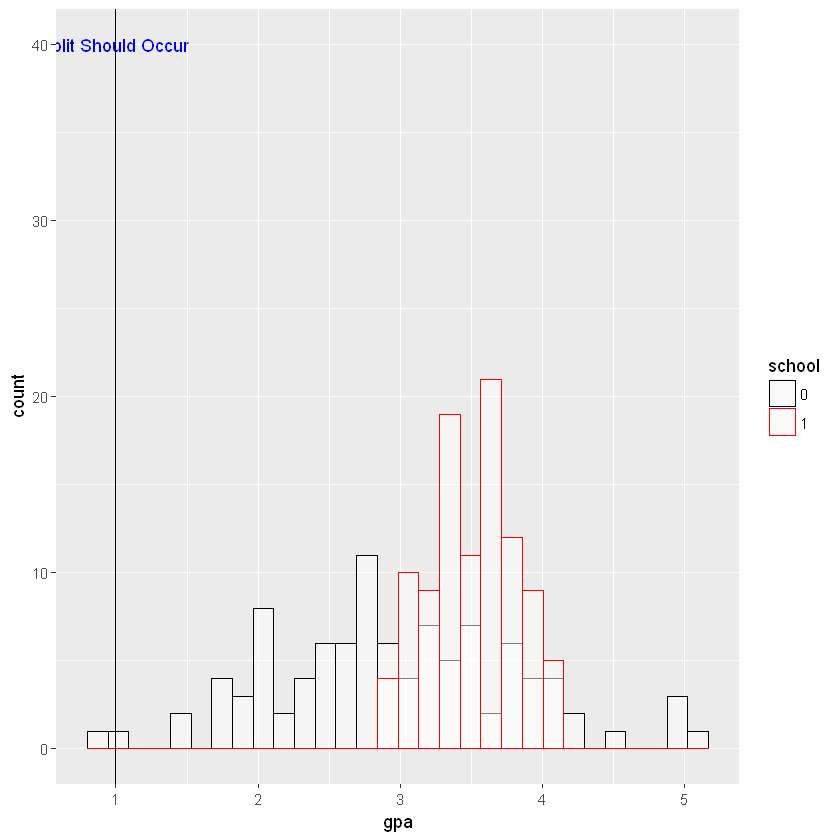

[1] "NULL"

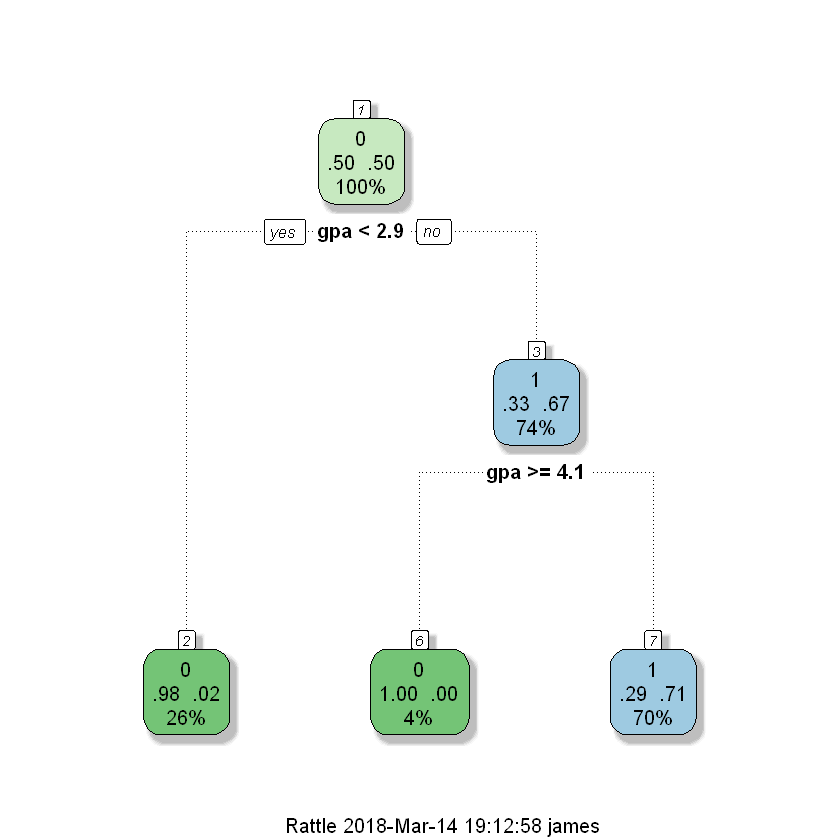

In [280]:
ggplot(grades, aes(x=gpa, color=school)) +
  geom_histogram(fill=c("white"), alpha=0.5, position="identity") + 
  scale_color_manual(values=c("black", "red", "black")) +
  geom_vline(xintercept=split_number) +
annotate("text", x=split_number,y=40,label="Split Should Occur",col="blue")

p2 = fancyRpartPlot(model_tree_school)
class(p2)


## Control Aspects is :
    # standard deviation
    # minsplit

## Show:
    # proportions
    # histogram
    # Tree




In [119]:
train <- data.frame(ClaimID = c(1,2,3),RearEnd = c(TRUE, FALSE, TRUE),Fraud = c(TRUE, FALSE, TRUE))
mytree <- rpart(Fraud ~ RearEnd, data = train, method = "class")
mytree
fancyRpartPlot(mytree)

n= 3 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 3 1 TRUE (0.3333333 0.6666667) *

ERROR: Error in apply(model$frame$yval2[, yval2per], 1, function(x) x[1 + x[1]]): dim(X) must have a positive length


Warning message:
"package 'gridExtra' was built under R version 3.4.3"
Listening on http://127.0.0.1:7295
